# Création du graphe BTLF



# Récupération des documents XML

In [1]:
import xml.etree.ElementTree as ET
filePattern = "../202308211746_onix3_M3_{}.xml"

ns = { 'd': "http://ns.editeur.org/onix/3.0/reference" }


items = [] 
for n in range (0,347):
    file = filePattern.format(n)
    data = ET.parse(file)
    root = data.getroot()
    products = root.findall("./d:Product", ns)
    items += products
    

print(len(items), " livres au total")

29599  livres au total


# Extraction des informations à partir des documents XML

In [56]:
import xml.etree.ElementTree as ET

productIdenfifier = {
    "01" : "Proprietary",
    "02" : "ISBN-10",
    "03" : "GTIN-13",
    "06" : "DOI",
    "13" : "LCCN" ,
    "15" : "ISBN-15",
}


productForm = {
    "00" : "Undefined",
    "BA" : "Book",
    "BB" : "Hardback",
    "BC" : "Paperback / softback",
    "BH" : "Board book",
    "BE" : "Spiral bound", 
    "SB" : "Multiple-component retail product, boxed",
    "SA" : "Multiple-component retail product",
    "ED" : "Digital download",
    "BO" : "Fold-out book or chart",
    "BD" : "Loose-leaf",
    "SF" : "Multiple-component retail product, part(s) enclosed",
    "AC" : "CD-Audio",
    "ZZ" : "Other merchandise"
}


primaryContentType = {
    "10" : "Text",   
}


titleElementLevel = {
    "01" : "Product",
    "02" : "Collection level",
    "03" : "Subcollection"   
}

titleDetail = {
    "00" : "Undefined",
    "01" : "Distinctive title (book); Cover title (serial); Title on item (serial content item or reviewed resource)",
    "02" : "ISSN key title of serial",
    "03" : "Title in original language",
    "04" : "Title acronym or initialism",
    "05" : "Abbreviated title",
    "06" : "Title in other language",
    "08" : "Former title", 
    "14" : "Alternative title",
}

contributorRole = {
    "A01" : "By (author)",
    "A02" : "With",
}

languageRole = {
    "01" : "Language of text",
    "02" : "Original language of a translated text",
}

subjectSchema = {
    "01" : "Dewey",
    "10" : "BISAC",
    "23" : "Publisher's own category",
    "93" : "Thema",
    "94" : "Thema place qualifier"   
}

pusblishingRole = {
    "01" : "Publisher",
    "10" : "Publishing group"
}

textType = {
    "03" : "Description",
    "06" : "Review quote",    
    "10" : "Promotional headline",
}


editeursQuebecois = [
    "Alire",
    "Atma",
    "Bayard Canada",
    "Bravo!",
    "Chouette",
    "De la Bagnole",
    "Édimag",
    "Fonfon",
    "Glénat Québec",
    "JCL",
    "La Courte échelle",
    "La Griffe",
    "La Mèche",
    "La Semaine",
    "Le Jour",
    "Les Éditions de l'Hexagone",
    "Les Éditions du Journal",
    "Les Éditions Québec-Livres",
    "Les Presses Libres",
    "Libre Expression",
    "Logiques",
    "Marcel Broquet Éditeur",
    "Marchand de feuilles",
    "Michel Quintin",
    "Monde Différent (Un)",
    "Parfum d'encre",
    "Perro éditeur",
    "Petit homme",
    "Presses Aventure",
    "Publistar",
    "Recto-Verso",
    "Soulières Éditeur",
    "Stanké",
    "Trécarré",
    "Typo",
    "VLB éditeur",
    "Wilson & Lafleur",
    "Z'Ailées",
]

# exclu: 
## PC10 = jeunes adultes: >18ans
## PC08 =  Tranche d'âge spécifique: pas de connaissance de la tranche d'age
## PC12 = public motivé: ne peut pas deduire age
## PC13 = professionel: surement > à 18 ans
## NS06 = Universitaire: > 18ans
## PC11 = adultes

# correspondance age/ niveau scolaires -> voir image
age_ranges = {
    "PC03" : [0, 1, 2, 3],
    "PC04" : [3, 4, 5, 6],
    "PC05" : [6, 8, 9],
    "PC06" : [9, 10, 11, 12],
    "PC07" : [12, 13, 14, 15],
    "PC01" : [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], # Tout Public: > 8 ans car sinon, longueur et format livre incompatible entre ages extrêmes
    "NS03" : [12, 13, 14, 15, 16],
    "NS02" : [6, 7, 8, 9, 10, 11],
    "NS01" : [0, 1, 2, 3, 4, 5], # prescolaire: < 6 ans
    "NS05" : [17, 18] # college = CEGEP
    }

age_ranges_str = {
    "PC03" : ["0", "1", "2", "3"],
    "PC04" : ["3", "4", "5", "6"],
    "PC05" : ["6", "8", "9"],
    "PC06" : ["9", "10", "11", "12"],
    "PC07" : ["12", "13", "14", "15"],
    "PC01" : ["8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]

    }

# Correspondance Age/ Niveau Scolaire
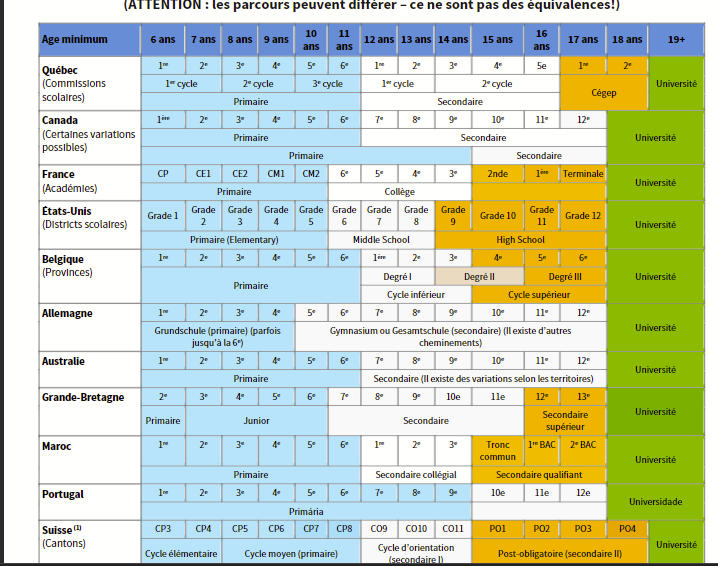

In [ ]:
listeInfo = {}

for p in items:
    # info = p.findall("./d:ProductIdentifier/d:ProductIDType", ns)
    # info = p.findall('./d:DescriptiveDetail/d:ProductForm', ns)
    # info = p.findall('./d:DescriptiveDetail/d:ProductFormDetail', ns)
    # info = p.findall('./d:DescriptiveDetail/d:PrimaryContentType', ns)

    # info = p.findall('.//d:TitleType', ns)

    # info = p.findall('.//d:LanguageRole', ns)
    # info = p.findall('.//d:LanguageCode', ns)

    # info = p.findall(".//d:SubjectSchemeIdentifier[.='20']../d:SubjectCode", ns)
    
    # info = p.findall('./d:DescriptiveDetail/d:Audience/d:AudienceCodeType', ns)
    # info = p.findall('.//d:ContentAudience', ns)
    
    # info = p.findall('./d:DescriptiveDetail/d:Collection/d:CollectionType', ns)

    # Iinfo = p.findall(".//d:PublishingDetail/d:Publisher/d:PublishingRole[.='01']../d:PublisherName", ns)     
    # info = p.findall(".//d:PublishingDetail/d:CityOfPublication", ns)
    # info = p.findall(".//d:CollateralDetail/d:TextContent/d:TextType", ns)
    # info = p.findall(".//d:RelatedMaterial/d:RelatedProduct/d:ProductRelationCode", ns)
    
    # info = p.findall("./d:PublishingDetail/d:PublishingDate/d:Date", ns)
 
    # info = p.findall('.//d:ContributorRole', ns)


    info = p.findall('.//d:Audience/d:AudienceCodeValue', ns)

    
    for i in info:
        if (i.text) in listeInfo:
            listeInfo[i.text] += 1
        else:
            listeInfo[i.text] = 1
            
        



In [ ]:
listeInfo.keys()

In [ ]:
listeInfo["PC04"]

In [ ]:
# Pour tester

total = 0
for (e,n) in sorted(listeInfo.items(), key = lambda x: x[1], reverse = True):
    print(e,n)
    total += n
    
print("Total", total)

# Description des données

## Statistiques sur les infos

* ProductIDType: tous les items ont les types de ID suivants: 
    * ISBN-15 (15) 
    * GTIN (03)
    * propriétaire (01)
    
* ProductForm: on trouve les codes suivants:
    * hardback (BB):  13823
    * paperback (BC): 15329
    * book (BA): 193
    * board book (BH): 21
    * spiral bound (BE): 78
    * Multiple-component retail product (SB et SA): 101
    * digital download (ED): 39
    * autres (BD, BO, SF, AC et ZZ): 15
    
* ProductFormDetail: Seulement 7635 livres ont cette information
    * Pocket (B113): 5092
    * With dust jacket (B501): 1229
    * Mass market (rack) paperback (B101): 504
    * Picture book (B221): 241
    * Book-as-toy (B213): 224
    
* PrimaryContentType: on trouve seulement 2 occurrences

* TitleType: 
    * Distinctive title... (01): 53198
    * Title in original language (03): 467
    * Autres (02 et 07): 2
    
* ContributionRole (une quaranteine) :
    * A01 (By (author)): 31203
    * A12 (Illustrated by): 12873
    * B06 (Translated by):  8780
    * A40 (Inked or colored by): 1018
    * A99 (Other primary creator): 598
    * B01 (Edited by): 573
    * A15 (Preface by): 441
    * B05 (Adapted by): 284
    * Autres: 1726
    
* Contributor/SequenceNumber: On note jusqu'à 27 auteurs
    * 1 auteur:  29560
    * 2 auteurs: 18985
    * 3 auteurs: 6095
    * 4 auteurs: 1651
    * 5 auteurs: 557
    * 6 auteurs: 237
    * 7 auteurs: 111
    * 8 auteurs: 52
    * 9 auteurs: 29
    * 10 auteurs: 12
    * 11 auteurs et plus: 34
* Contributor/BiographicalNote: 1161 instances
* LanguageRole: 
    * Language of text (01): 29411
    * Original language of a translated text (02): 8224
* LanguageCode: 
    * Francais: 29149
    * Anglais: 4910
    * Japonais: 1440
    * Autres: 2136
    
* SujbectSchemaIdentifer:
    * Dewey (01): 29592
    * Thema (93): 30220
    * Thema place qualifier (94): 486
    * Thema language qualifier (95): 37
    * Thema time period qualifier (96): 142
    * Thema educational purpose qualifier (97): 72
    * Thema interest age / special interest qualifier (98): 193
    * Thema style qualifier (99): 11
    
* AudienceCodeType: on trouve seulement le code 06 (BTLF)
* CollateralDetail/TextContent/ContentAudience: on trouve seulement le code 00 (unrestricted)


* CollectionType: on trouve seulement le code 10 (Publisher collection)  

* PublishingRole: 
     * Publisher (01): 29660
     * Co-publisher (02): 395
     
* CityOfPublication: 
    * Paris: 17172
    * Montréal: 1468
    * Arles: 1380
    * Bruxelles: 1268
    * Toulouse: 1001
    

* CollateralDetail/TextContent/TextType:
    * Short description/annotation (2): 29235
    * Primary cover copy (5): 23016
    * Biographical note (12): 2400  
    * Description (03):  1469
    * Review quote (06): 374
    * Official recommendation (22): 291
    

* RelatedMaterial/RelatedProduct/ProductRelationCode:
    * Electronic version available as (27):  6023
    * Replaces (03): 1829
    * Replaced by (05): 1196
    * Epublication based on (print product) (13): 41
    * Alternative format (06): 26
    * Autres (01, 23 et 32): 7
    
* AudienceCodeType: seulement le code 06 (BTLF audience code). 
* Les valeurs possibles sont les suivantes:
    * PC04 (3-6 ans) 7187
    * PC06 (9-12 ans) 6211
    * PC05 (6-9 ans) 6147
    * PC01 (Tous publics) 4605
    * PC07 (12-15 ans) 4422
    * PC03 (0-3 ans) 846
    * PC10 (Jeunes adultes) 95
    * NS03 (Secondaire) 43 
    * PC08 (Tranche d'âge spécifique) 15 -> pas de specificité sur age
    * NS02 (Primaire) 14
    * PC12 (Public Motivé) 6
    * PC13 (Professionel) 2
    * NS01 (Préscolaire) 2
    * NS06 (Universitaire) 2
    * NS05 (Collégial) 1
    * PC11 (Adultes seulement) 1
    



# Création du graphe RDF

In [3]:
from rdflib import Graph, Namespace, Literal, URIRef
from rdflib import RDF, RDFS, OWL, XSD


SCHEMA = Namespace("http://schema.org/")
DCTERMS = Namespace("http://purl.org/dc/terms/")
DBO = Namespace("http://dbpedia.org/ontology/")
BTLF = Namespace("http://www.btlf.com/")
BTLF_PROP = Namespace("http://www.btlf.com/prop/")



In [39]:
graphe_Auteurs = Graph()
graphe_Auteurs.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Auteurs.bind("btlf-prop","http://www.btlf.com/prop/", override=True)
graphe_Auteurs.bind("btlf-classe","http://www.btlf.com/classe/", override=True)
graphe_Auteurs.bind("btlf-auteur","http://www.btlf.com/auteur/", override=True)


In [48]:
graphe_Livres = Graph()
graphe_Livres.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Livres.bind("btlf-prop","http://www.btlf.com/prop/", override=True)
graphe_Livres.bind("btlf-classe","http://www.btlf.com/classe/", override=True)
graphe_Livres.bind("btlf-livre","http://www.btlf.com/livre/", override=True)


In [49]:
graphe_Editeurs = Graph()
graphe_Editeurs.bind("schema","http://schema.org/", override=True, replace=True)
graphe_Editeurs.bind("btlf-prop","http://www.btlf.com/prop/", override=True)
graphe_Editeurs.bind("btlf-classe","http://www.btlf.com/classe/", override=True)
graphe_Editeurs.bind("btlf-editeur","http://www.btlf.com/editeur/", override=True)


## Création du graphe des auteurs


In [50]:
id = 0
auteurs = {}
for item in items:
    editeur = item.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
    if not editeur:
        print('ERREUR',item)   

    liste_auteurs = item.findall('.//d:DescriptiveDetail/d:Contributor', ns)
    for a in liste_auteurs: 
        nom = a.find(".//d:PersonNameInverted", ns)
        if nom == None:
            continue
        if nom.text not in auteurs:
            id += 1
            auteurs[nom.text] = BTLF['auteur/' + str(id)]
            graphe_Auteurs.add((BTLF['auteur/' + str(id)],SCHEMA.name,Literal(nom.text)))
            graphe_Auteurs.add((BTLF['auteur/' + str(id)],RDF.type,BTLF['classe/Auteur']))
                
            bio = a.findall('./d:BiographicalNote', ns)
            if bio:
                graphe_Auteurs.add((BTLF['auteur/' + str(id)],BTLF_PROP.bio,Literal(bio[0].text)))

            # print(nom.text, auteurs[nom])

In [10]:
print(len(auteurs),'auteurs')
print(len(graphe_Auteurs), 'triplets')

18147 auteurs
36722 triplets


In [11]:
for (s,p,o) in graphe_Auteurs.triples((BTLF['auteur/335'],None,None)):
    print(s,p,o)

http://www.btlf.com/auteur/335 http://schema.org/name Dieuaide, Sophie
http://www.btlf.com/auteur/335 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.btlf.com/classe/Auteur


## Création du graphe des éditeurs

In [51]:
id = 0


editeurs = {}

for root in items:
    editeur = root.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns) 
    if not editeur:
        print('ERREUR',item)
    for e in editeur:
        editeurs[e.text] = ""
        
    
for n in editeurs:
    editeurs[n] = BTLF['editeur/' + str(id)]
    graphe_Editeurs.add((BTLF['editeur/' + str(id)], RDF.type, BTLF['classe/Editeur']))   
    graphe_Editeurs.add((BTLF['editeur/' + str(id)], SCHEMA.name, Literal(n))) 
    id += 1
    
print(editeurs)

{'Editions Gallimard': rdflib.term.URIRef('http://www.btlf.com/editeur/0'), 'Les Trois ourses': rdflib.term.URIRef('http://www.btlf.com/editeur/1'), 'One Stroke': rdflib.term.URIRef('http://www.btlf.com/editeur/2'), 'Editions Fleurus': rdflib.term.URIRef('http://www.btlf.com/editeur/3'), 'Flammarion': rdflib.term.URIRef('http://www.btlf.com/editeur/4'), 'Le Navire en pleine ville': rdflib.term.URIRef('http://www.btlf.com/editeur/5'), 'Réseau Canopé': rdflib.term.URIRef('http://www.btlf.com/editeur/6'), 'BNF-Centre national de la littérature pour la jeunesse': rdflib.term.URIRef('http://www.btlf.com/editeur/7'), 'Mango': rdflib.term.URIRef('http://www.btlf.com/editeur/8'), 'Quiquandquoi': rdflib.term.URIRef('http://www.btlf.com/editeur/9'), 'Magnard-Vuibert': rdflib.term.URIRef('http://www.btlf.com/editeur/10'), 'Soleil productions': rdflib.term.URIRef('http://www.btlf.com/editeur/11'), 'Gulf Stream (Editions du)': rdflib.term.URIRef('http://www.btlf.com/editeur/12'), 'Bayard Editions J

In [ ]:
print(len(graphe_Editeurs))

## Création du graphe des livres

In [52]:
livres = []
for root in items:
    rf = root.find('.//d:RecordReference', ns)
    graphe_Livres.add((BTLF['livre/' + str(rf.text)], RDF.type, BTLF['classe/Livre']))


    editeursLivre = root.findall(".//d:PublishingRole[.='01']../d:PublisherName", ns)     
    for e in editeursLivre:
        graphe_Livres.add((BTLF['livre/' + rf.text], SCHEMA.publisher, editeurs[e.text]))
        
    liste_auteurs = root.findall('.//d:Contributor', ns)
    if len(liste_auteurs) > 0:
        for a in liste_auteurs: 
            nom = a.find(".//d:ContributorRole[.='A01']../d:PersonNameInverted", ns)
            if nom != None:
                graphe_Livres.add((BTLF['livre/' + rf.text], SCHEMA.author, auteurs[nom.text]))

        for a in liste_auteurs: 
            nom = a.find(".//d:ContributorRole[.='A12']../d:PersonNameInverted", ns)
            if nom != None:
                graphe_Livres.add((BTLF['livre/' + rf.text], SCHEMA.illustrator, auteurs[nom.text]))

    isbn = root.findall(".//d:ProductIdentifier/d:ProductIDType[.='15']../d:IDValue", ns)
    if isbn:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], SCHEMA.isbn, Literal(isbn[0].text)))

    
       
    language = root.find('.//d:Language/d:LanguageCode', ns)
    if language != None:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], SCHEMA.inLanguage, Literal(language.text)))

    

    liste_thema_main_subjet = root.findall(".//d:Subject/d:MainSubject/../d:SubjectSchemeIdentifier[.='93']../d:SubjectCode", ns)
    for t in liste_thema_main_subjet:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], BTLF_PROP.mainSubjectThema, Literal(t.text)))

                  
    liste_thema_subject = root.findall(".//d:Subject/d:SubjectSchemeIdentifier[.='93']../d:SubjectCode", ns)
    for t in liste_thema_subject:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], BTLF_PROP.subjectThema, Literal(t.text)))           
        
        
    titre = root.findall('.//d:TitleText', ns)
    if titre:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], SCHEMA.name, Literal(titre[0].text)))        
        
        
    description = root.findall(".//d:TextContent/d:TextType[.='03']../d:Text", ns)
    if description:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], BTLF_PROP.description, Literal(description[0].text)))
       
        
    reviewQuote = root.findall(".//d:TextContent/d:TextType[.='06']../d:Text", ns)
    if reviewQuote:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], BTLF_PROP.commentaire, Literal(reviewQuote[0].text)))


    date = root.find(".//d:PublishingDate/d:Date", ns)
    if date != None:
        graphe_Livres.add((BTLF['livre/' + str(rf.text)], SCHEMA.datePublished, Literal(date.text)))
        
    audience = root.find(".//d:Audience/d:AudienceCodeValue", ns)
    if audience != None and audience.text in age_ranges:
        age_range = age_ranges[audience.text]
        for age in age_range:     
            graphe_Livres.add((BTLF['livre/' + str(rf.text)], BTLF_PROP.age, Literal(age)))

In [ ]:
print(len(graphe_Livres),'triplets')

In [17]:
# for (s,p,o) in graphe_Livres.triples((BTLF['livre/375883'],None,None)):
#     print(s,p,o)

for (s,p,o) in graphe_Livres.triples((None,SCHEMA.isbn,None)):
    print(s,p,o)


http://www.btlf.com/livre/NOT16372164181951 http://schema.org/isbn 9782070533206
http://www.btlf.com/livre/NOT16384732201612 http://schema.org/isbn 9782070534159
http://www.btlf.com/livre/NOT16448638692195 http://schema.org/isbn 9782917057063
http://www.btlf.com/livre/NOT16384815068678 http://schema.org/isbn 9782215084563
http://www.btlf.com/livre/NOT16383935942324 http://schema.org/isbn 9782746708402
http://www.btlf.com/livre/NOT16374048672453 http://schema.org/isbn 9782081631427
http://www.btlf.com/livre/NOT16373346223498 http://schema.org/isbn 9782081613324
http://www.btlf.com/livre/NOT16422094036408 http://schema.org/isbn 9782081634176
http://www.btlf.com/livre/NOT16374370980622 http://schema.org/isbn 9782081634701
http://www.btlf.com/livre/NOT16376284896565 http://schema.org/isbn 9782746708723
http://www.btlf.com/livre/NOT16444372663899 http://schema.org/isbn 9782916517094
http://www.btlf.com/livre/NOT16438654315382 http://schema.org/isbn 9782916517087
http://www.btlf.com/livre/NO

## Sauvegarde du graphe

In [53]:
fichier = open("../Graphes/grapheAuteurs.ttl","wb")
graphe_Auteurs.serialize(fichier) 
fichier.close()

In [54]:
fichier = open("../Graphes/grapheLivres.ttl","wb")
graphe_Livres.serialize(fichier) 
fichier.close()

In [55]:
fichier = open("../Graphes/grapheEditeurs.ttl","wb")
graphe_Editeurs.serialize(fichier) 
fichier.close()